# Isolation Forest

Isolation Forest is an ensemble tree-based anomaly detection algorithm that operates on the principle that "anomalies are few and different". Instead of profiling normal data points, it isolates anomalies by randomly partitioning the feature space.


Most methods: Profile normal points, flag deviations as anomalies

Isolation Forest: Directly isolates anomalies (fewer partitions needed)

### How It Works
Imagine finding a needle in a haystack:

Haystack (normal points):

Randomly divide: hay on both sides

Divide again: still hay on both sides

Need many divisions to isolate any specific straw

Needle (anomaly):

Randomly divide: needle separates immediately!

Only 1-2 divisions needed to isolate the needle

### Mathematical 
1. Random Partitioning Process
For dataset D with n points and d features:

Randomly select a feature q

Randomly select a split value p between min and max of feature q

Partition: points with q ≤ p go left, others go right

Recursively repeat until:

Point is isolated (alone in partition)

Maximum tree depth reached

2. Path Length
The number of edges (splits) from root to leaf:


``` h(x) = path length to isolate point x ```
Anomalies: Small h(x) (isolated quickly)

Normal points: Large h(x) (need many splits)

3. Average Path Length
Expected path length for binary search tree with n nodes:


``` c(n) = 2H(n-1) - 2(n-1)/n ```
Where H(i) is harmonic number ≈ ln(i) + 0.5772156649

4. Anomaly Score

``` s(x, n) = 2^{-E[h(x)]/c(n)}  ```


E[h(x)] = average path length across all trees

c(n) = normalization factor

Score Interpretation:

s ≈ 1: Definitely an anomaly

s ≈ 0.5: Normal point

s < 0.5: Definitely normal

#### Algorithm Step-by-Step
``` bash
Building Isolation Trees:
Input: Dataset X, tree height limit l
Output: Isolation Tree


function iTree(X, e, l):
    if |X| ≤ 1 or e ≥ l:
        return exNode {Size = |X|}
    else:
        Randomly select attribute q
        Randomly select split value p between min and max of q
        X_l = {x ∈ X | x_q < p}
        X_r = {x ∈ X | x_q ≥ p}
        return inNode {
            Left = iTree(X_l, e+1, l),
            Right = iTree(X_r, e+1, l),
            SplitAtt = q,
            SplitValue = p
        }
Calculating Path Length:

function PathLength(x, T, e):
    if T is external node:
        return e + c(T.size)
    a = T.splitAtt
    if x[a] < T.splitValue:
        return PathLength(x, T.left, e+1)
    else:
        return PathLength(x, T.right, e+1)
Detailed Example Walkthrough
Dataset: Credit card transactions


Normal: [$50, $75, $100, $125, $150]
Anomaly: [$10,000]
Building one isolation tree:

Step 1: Randomly select feature (only amount)
Step 2: Randomly select split between min($50) and max($10,000)
Say split = $5,000

Partition:

Left: [$50, $75, $100, $125, $150] (all normal)

Right: [$10,000] (ANOMALY ISOLATED!)

Path lengths:

Anomaly ($10,000): path length = 1

Normal ($50): needs ~6-8 splits

After many trees:

Anomaly consistently isolated quickly → high anomaly score

Normal points need many splits → low anomaly scores

```

=== Credit Card Fraud Detection Example ===
Total transactions: 1020
Normal transactions: 1000
Fraudulent transactions: 20
Fraud rate: 1.96%

=== Performance Metrics ===
              precision    recall  f1-score   support

      Normal       0.05      0.00      0.00      1000
       Fraud       0.00      0.00      0.00        20

    accuracy                           0.00      1020
   macro avg       0.02      0.00      0.00      1020
weighted avg       0.05      0.00      0.00      1020

Confusion Matrix:
[[  1 999]
 [ 20   0]]

Fraud Detection Rate: 0/20 = 0.00%
False Positive Rate: 999/1000 = 99.90%
ROC AUC: 1.000

=== Feature Importance Analysis ===
Amount: 0.204
Time Since Last: 0.203
Location Distance: 0.200
Device Trust: 0.206
Transactions Today: 0.187

=== Explanation of Detected Fraud Cases ===

Fraud Case 1:
  Anomaly score: 0.156
  Interpretation: Moderately isolated (potential anomaly)
  Top contributing features:
    Feature: z-score=6.95, importance=0.200
    Feature: 

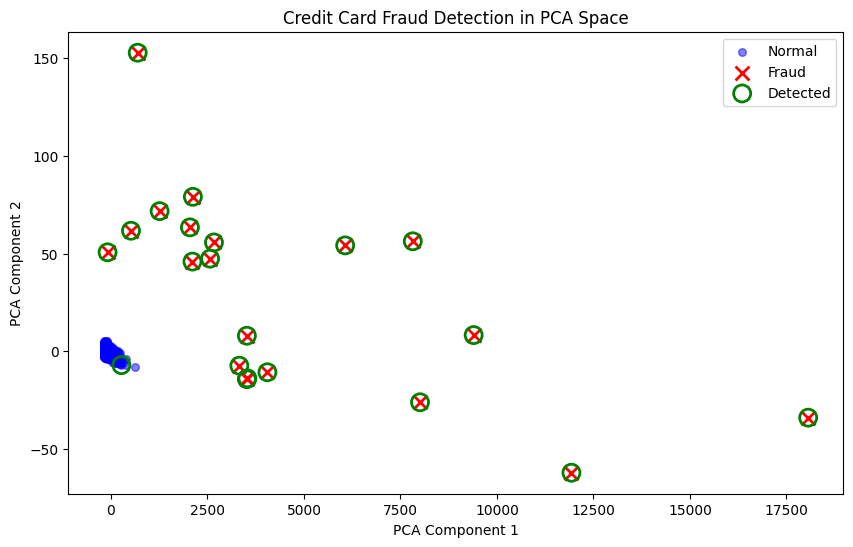


=== Ensemble Isolation Forest Example ===
Ensemble detected 15 anomalies
Score range: [-0.177, 0.279]
Average prediction consistency: 98.48%
Points with low consistency (<80%): 10

=== Isolation Forest Parameter Tuning ===

1. PARAMETER SELECTION:
   - n_estimators: 100-200 (more for complex data)
   - max_samples: 256 (good default) or 'auto'
   - contamination: Use domain knowledge or 'auto'
   - max_features: 1.0 (use all features)

2. FEATURE ENGINEERING:
   - Isolation Forest handles mixed data types well
   - No need for feature scaling (tree-based)
   - Include domain-specific features
   - Remove highly correlated features

3. INTERPRETATION:
   - Score close to 1: Strong anomaly
   - Score around 0.5: Borderline case
   - Score close to 0: Normal point
   - Use feature importances for explanation

4. ADVANTAGES:
   - Linear time complexity O(n)
   - Low memory requirement
   - Handles high-dimensional data
   - No distance/density calculations
   - Parallelizable

5. LIMITATI

'\nIsolation Forest revolutionized anomaly detection by:\n1. Being the FIRST truly linear-time anomaly detector\n2. Using RANDOM partitioning instead of distance/density\n3. Working well with HIGH-DIMENSIONAL data\n4. Requiring NO feature scaling\n5. Being HIGHLY parallelizable\n\nKey Papers:\n- Liu, F. T., Ting, K. M., & Zhou, Z. H. (2008). "Isolation Forest"\n- Liu, F. T., Ting, K. M., & Zhou, Z. H. (2012). "Isolation-Based Anomaly Detection"\n\nWhy it works:\n- Anomalies are "few and different"\n- They\'re easier to isolate than normal points\n- Random partitioning ensures unbiased detection\n- Ensemble averaging reduces variance\n\nProduction Use Cases:\n- Credit card fraud detection\n- Network intrusion detection\n- Manufacturing defect detection\n- Medical anomaly detection\n- Quality control systems\n'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

class IsolationForestExplainer:
    """
    Comprehensive Isolation Forest implementation with explanations
    """
    
    def __init__(self, n_estimators=100, contamination=0.1, 
                 max_samples='auto', random_state=42):
        """
        Initialize Isolation Forest
        
        Parameters:
        -----------
        n_estimators : int
            Number of trees in the forest
        contamination : float
            Expected proportion of anomalies in data
        max_samples : int or 'auto'
            Number of samples to draw for each tree
        random_state : int
            Random seed for reproducibility
        """
        self.n_estimators = n_estimators
        self.contamination = contamination
        self.max_samples = max_samples
        self.random_state = random_state
        
        self.model = IsolationForest(
            n_estimators=n_estimators,
            contamination=contamination,
            max_samples=max_samples,
            random_state=random_state,
            verbose=0
        )
        
        # For feature importance analysis
        self.feature_importances_ = None
        self.tree_depths_ = None
        self.path_lengths_ = None
    
    def fit_predict(self, X, compute_importances=True):
        """
        Fit model and return predictions
        """
        X = np.array(X)
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        # Fit the model
        self.model.fit(X)
        
        # Get predictions and scores
        self.predictions = self.model.predict(X)  # 1=normal, -1=anomaly
        self.scores = self.model.decision_function(X)
        
        # Convert to anomaly scores (higher = more anomalous)
        self.anomaly_scores = -self.scores
        
        if compute_importances:
            self._compute_feature_importances()
            self._analyze_tree_depths()
            self._compute_path_lengths()
        
        return self.predictions, self.anomaly_scores
    
    def _compute_feature_importances(self):
        """
        Compute feature importances based on split frequencies
        """
        feature_counts = np.zeros(self.n_features)
        total_splits = 0
        
        for tree in self.model.estimators_:
            tree_structure = tree.tree_
            features = tree_structure.feature
            
            # Count features used in splits (ignore leaf nodes: feature = -2)
            valid_features = features[features >= 0]
            unique_features, counts = np.unique(valid_features, return_counts=True)
            
            for feat, count in zip(unique_features, counts):
                feature_counts[feat] += count
                total_splits += count
        
        if total_splits > 0:
            self.feature_importances_ = feature_counts / total_splits
        else:
            self.feature_importances_ = np.ones(self.n_features) / self.n_features
        
        return self.feature_importances_
    
    def _analyze_tree_depths(self):
        """Analyze tree depths in the forest"""
        depths = []
        for tree in self.model.estimators_:
            depths.append(tree.get_depth())
        
        self.tree_depths_ = {
            'mean': np.mean(depths),
            'std': np.std(depths),
            'min': np.min(depths),
            'max': np.max(depths),
            'all': depths
        }
        return self.tree_depths_
    
    def _compute_path_lengths(self):
        """Compute path lengths for all points"""
        self.path_lengths_ = np.zeros((self.n_samples, self.n_estimators))
        
        for tree_idx, tree in enumerate(self.model.estimators_):
            for point_idx in range(self.n_samples):
                self.path_lengths_[point_idx, tree_idx] = \
                    self._get_path_length(tree, self.X[point_idx])
        
        return self.path_lengths_
    
    def _get_path_length(self, tree, point):
        """Get path length for a point in a specific tree"""
        node = 0
        path_length = 0
        
        while tree.tree_.children_left[node] != -1:  # Not a leaf
            feature = tree.tree_.feature[node]
            threshold = tree.tree_.threshold[node]
            
            if point[feature] <= threshold:
                node = tree.tree_.children_left[node]
            else:
                node = tree.tree_.children_right[node]
            
            path_length += 1
        
        # Adjust for leaf node size
        leaf_size = tree.tree_.n_node_samples[node]
        path_length += self._c(leaf_size)
        
        return path_length
    
    def _c(self, n):
        """Average path length of unsuccessful search in BST"""
        if n <= 1:
            return 0
        elif n == 2:
            return 1
        else:
            return 2 * (np.log(n - 1) + 0.5772156649) - 2 * (n - 1) / n
    
    def explain_point(self, point_index, n_trees=5):
        """
        Explain why a point was flagged as anomaly
        """
        if not hasattr(self, 'predictions'):
            raise ValueError("Must fit the model first")
        
        point = self.X[point_index]
        is_anomaly = self.predictions[point_index] == -1
        anomaly_score = self.anomaly_scores[point_index]
        
        explanation = {
            'point': point,
            'is_anomaly': is_anomaly,
            'anomaly_score': anomaly_score,
            'normalized_score': self._normalize_score(anomaly_score),
            'average_path_length': np.mean(self.path_lengths_[point_index]),
            'feature_contributions': {},
            'tree_explanations': []
        }
        
        # Feature contributions
        for i, (feature_val, importance) in enumerate(zip(point, self.feature_importances_)):
            feature_mean = np.mean(self.X[:, i])
            feature_std = np.std(self.X[:, i])
            z_score = abs(feature_val - feature_mean) / feature_std if feature_std > 0 else 0
            
            explanation['feature_contributions'][f'feature_{i}'] = {
                'value': feature_val,
                'importance': importance,
                'z_score': z_score,
                'contribution': importance * z_score
            }
        
        # Tree-level explanations
        for tree_idx in range(min(n_trees, self.n_estimators)):
            tree = self.model.estimators_[tree_idx]
            path_length = self.path_lengths_[point_index, tree_idx]
            max_depth = tree.get_depth()
            
            tree_expl = {
                'tree_index': tree_idx,
                'path_length': path_length,
                'max_depth': max_depth,
                'isolation_ease': 1 - (path_length / max_depth) if max_depth > 0 else 0
            }
            explanation['tree_explanations'].append(tree_expl)
        
        # Overall interpretation
        avg_isolation_ease = np.mean([t['isolation_ease'] for t in explanation['tree_explanations']])
        
        if avg_isolation_ease > 0.7:
            explanation['interpretation'] = "Easily isolated (strong anomaly)"
        elif avg_isolation_ease > 0.4:
            explanation['interpretation'] = "Moderately isolated (potential anomaly)"
        else:
            explanation['interpretation'] = "Difficult to isolate (normal point)"
        
        return explanation
    
    def _normalize_score(self, score):
        """Normalize score to 0-1 range"""
        min_score = np.min(self.anomaly_scores)
        max_score = np.max(self.anomaly_scores)
        return (score - min_score) / (max_score - min_score)
    
    def visualize(self, highlight_points=None):
        """
        Visualize Isolation Forest results
        """
        if not hasattr(self, 'predictions'):
            raise ValueError("Must fit the model first")
        
        n_features = self.n_features
        
        if n_features == 2:
            self._visualize_2d(highlight_points)
        elif n_features > 2:
            self._visualize_high_dim(highlight_points)
    
    def _visualize_2d(self, highlight_points=None):
        """Visualize 2D data"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        
        # Plot 1: Data points colored by anomaly score
        scatter1 = axes[0, 0].scatter(self.X[:, 0], self.X[:, 1], 
                                     c=self.anomaly_scores, 
                                     cmap='viridis', alpha=0.7)
        plt.colorbar(scatter1, ax=axes[0, 0], label='Anomaly Score')
        axes[0, 0].set_title('Isolation Forest Anomaly Scores')
        axes[0, 0].set_xlabel('Feature 1')
        axes[0, 0].set_ylabel('Feature 2')
        
        # Plot 2: Anomalies highlighted
        normal_mask = self.predictions == 1
        anomaly_mask = self.predictions == -1
        
        axes[0, 1].scatter(self.X[normal_mask, 0], self.X[normal_mask, 1],
                          c='blue', alpha=0.5, s=30, label='Normal')
        axes[0, 1].scatter(self.X[anomaly_mask, 0], self.X[anomaly_mask, 1],
                          c='red', s=100, marker='x', linewidth=2, label='Anomalies')
        
        if highlight_points is not None:
            axes[0, 1].scatter(self.X[highlight_points, 0], self.X[highlight_points, 1],
                              facecolors='none', edgecolors='green', s=200,
                              linewidth=2, label='Highlighted')
        
        axes[0, 1].set_title(f'Detected Anomalies (Contamination: {self.contamination})')
        axes[0, 1].set_xlabel('Feature 1')
        axes[0, 1].set_ylabel('Feature 2')
        axes[0, 1].legend()
        
        # Plot 3: Anomaly score distribution
        axes[0, 2].hist(self.anomaly_scores, bins=30, alpha=0.7, edgecolor='black')
        
        # Mark contamination threshold
        if self.contamination != 'auto':
            threshold = np.percentile(self.anomaly_scores, 100 * (1 - self.contamination))
            axes[0, 2].axvline(threshold, color='red', linestyle='--', 
                              label=f'Threshold: {threshold:.3f}')
        
        axes[0, 2].axvline(0.5, color='green', linestyle='--', 
                          label='Score = 0.5 (Borderline)', alpha=0.7)
        axes[0, 2].set_title('Anomaly Score Distribution')
        axes[0, 2].set_xlabel('Anomaly Score')
        axes[0, 2].set_ylabel('Frequency')
        axes[0, 2].legend()
        
        # Plot 4: Feature importances
        if self.feature_importances_ is not None:
            features = [f'Feature {i}' for i in range(self.n_features)]
            axes[1, 0].bar(features, self.feature_importances_)
            axes[1, 0].set_title('Feature Importances (Split Frequencies)')
            axes[1, 0].set_xlabel('Features')
            axes[1, 0].set_ylabel('Importance')
            axes[1, 0].tick_params(axis='x', rotation=45)
        
        # Plot 5: Tree depths distribution
        if self.tree_depths_ is not None:
            axes[1, 1].hist(self.tree_depths_['all'], bins=20, alpha=0.7, edgecolor='black')
            axes[1, 1].axvline(self.tree_depths_['mean'], color='red', linestyle='--',
                              label=f'Mean: {self.tree_depths_["mean"]:.1f}')
            axes[1, 1].set_title('Isolation Tree Depths Distribution')
            axes[1, 1].set_xlabel('Tree Depth')
            axes[1, 1].set_ylabel('Count')
            axes[1, 1].legend()
        
        # Plot 6: Path lengths vs anomaly scores
        if self.path_lengths_ is not None:
            avg_path_lengths = np.mean(self.path_lengths_, axis=1)
            axes[1, 2].scatter(avg_path_lengths, self.anomaly_scores, alpha=0.7)
            axes[1, 2].set_xlabel('Average Path Length')
            axes[1, 2].set_ylabel('Anomaly Score')
            axes[1, 2].set_title('Path Length vs Anomaly Score')
            axes[1, 2].axhline(0.5, color='gray', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.show()

# Example: Credit Card Fraud Detection
def credit_card_fraud_example():
    """
    Real-world example: Credit card fraud detection
    """
    np.random.seed(42)
    
    # Simulate normal transactions
    n_normal = 1000
    normal_transactions = np.column_stack([
        np.random.exponential(100, n_normal),      # Amount (right-skewed)
        np.random.normal(2, 0.5, n_normal),        # Time since last transaction
        np.random.exponential(1, n_normal),        # Location distance
        np.random.beta(2, 5, n_normal),            # Device trust score (0-1)
        np.random.poisson(10, n_normal),           # Transactions today
    ])
    
    # Simulate fraudulent transactions
    n_fraud = 20
    fraud_transactions = np.column_stack([
        np.random.exponential(5000, n_fraud),      # Large amounts
        np.random.exponential(0.1, n_fraud),       # Very recent
        np.random.exponential(100, n_fraud),       # Far locations
        np.random.beta(8, 1, n_fraud),             # Low trust scores
        np.random.poisson(50, n_fraud),            # Many transactions
    ])
    
    # Combine
    X = np.vstack([normal_transactions, fraud_transactions])
    y_true = np.array([0] * n_normal + [1] * n_fraud)
    
    print("=== Credit Card Fraud Detection Example ===")
    print(f"Total transactions: {len(X)}")
    print(f"Normal transactions: {n_normal}")
    print(f"Fraudulent transactions: {n_fraud}")
    print(f"Fraud rate: {n_fraud/len(X)*100:.2f}%")
    
    # Apply Isolation Forest
    iso_forest = IsolationForestExplainer(
        n_estimators=200,
        contamination=0.02,  # Expect ~2% fraud
        max_samples=256,
        random_state=42
    )
    
    y_pred, anomaly_scores = iso_forest.fit_predict(X)
    
    # Convert predictions (1=normal, -1=fraud)
    y_pred_binary = (y_pred == 1).astype(int)
    
    # Evaluate performance
    from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
    
    print("\n=== Performance Metrics ===")
    print(classification_report(y_true, y_pred_binary, 
                               target_names=['Normal', 'Fraud']))
    
    cm = confusion_matrix(y_true, y_pred_binary)
    print(f"Confusion Matrix:\n{cm}")
    print(f"\nFraud Detection Rate: {cm[1,1]}/{cm[1,:].sum()} = {cm[1,1]/cm[1,:].sum():.2%}")
    print(f"False Positive Rate: {cm[0,1]}/{cm[0,:].sum()} = {cm[0,1]/cm[0,:].sum():.2%}")
    
    # ROC AUC
    roc_auc = roc_auc_score(y_true, anomaly_scores)
    print(f"ROC AUC: {roc_auc:.3f}")
    
    # Feature analysis
    print("\n=== Feature Importance Analysis ===")
    feature_names = ['Amount', 'Time Since Last', 'Location Distance', 
                     'Device Trust', 'Transactions Today']
    
    for i, (name, importance) in enumerate(zip(feature_names, iso_forest.feature_importances_)):
        print(f"{name}: {importance:.3f}")
    
    # Explain detected fraud cases
    print("\n=== Explanation of Detected Fraud Cases ===")
    fraud_indices = np.where(y_true == 1)[0]
    
    for i, idx in enumerate(fraud_indices[:3]):  # Explain first 3 fraud cases
        explanation = iso_forest.explain_point(idx, n_trees=3)
        
        print(f"\nFraud Case {i+1}:")
        print(f"  Anomaly score: {explanation['anomaly_score']:.3f}")
        print(f"  Interpretation: {explanation['interpretation']}")
        
        # Show top contributing features
        contributions = list(explanation['feature_contributions'].values())
        contributions.sort(key=lambda x: x['contribution'], reverse=True)
        
        print("  Top contributing features:")
        for j, contrib in enumerate(contributions[:2]):
            print(f"    Feature: z-score={contrib['z_score']:.2f}, "
                  f"importance={contrib['importance']:.3f}")
    
    # Visualize results
    if X.shape[1] > 2:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        
        plt.figure(figsize=(10, 6))
        plt.scatter(X_pca[y_true==0, 0], X_pca[y_true==0, 1], 
                   c='blue', alpha=0.5, s=30, label='Normal')
        plt.scatter(X_pca[y_true==1, 0], X_pca[y_true==1, 1], 
                   c='red', s=100, marker='x', linewidth=2, label='Fraud')
        plt.scatter(X_pca[y_pred==-1, 0], X_pca[y_pred==-1, 1],
                   facecolors='none', edgecolors='green', s=150,
                   linewidth=2, label='Detected')
        plt.title('Credit Card Fraud Detection in PCA Space')
        plt.xlabel('PCA Component 1')
        plt.ylabel('PCA Component 2')
        plt.legend()
        plt.show()
    
    return iso_forest, X, y_true, y_pred, anomaly_scores

# Run the example
fraud_results = credit_card_fraud_example()

# Advanced: Ensemble of Isolation Forests
class EnsembleIsolationForest:
    """
    Ensemble of Isolation Forests for robust anomaly detection
    """
    
    def __init__(self, n_forests=5, n_estimators=100, 
                 contamination_range=(0.01, 0.2), max_samples=256):
        self.n_forests = n_forests
        self.n_estimators = n_estimators
        self.contamination_range = contamination_range
        self.max_samples = max_samples
        self.forests = []
        self.weights = []
    
    def fit_predict(self, X):
        """
        Fit multiple Isolation Forests and ensemble their predictions
        """
        X = np.array(X)
        self.X = X
        self.n_samples, self.n_features = X.shape
        
        all_scores = []
        
        # Train multiple forests with different parameters
        for i in range(self.n_forests):
            # Vary contamination parameter
            contamination = np.random.uniform(*self.contamination_range)
            
            # Create and fit forest
            iso_forest = IsolationForest(
                n_estimators=self.n_estimators,
                contamination=contamination,
                max_samples=self.max_samples,
                random_state=42 + i,
                bootstrap=True
            )
            
            iso_forest.fit(X)
            self.forests.append(iso_forest)
            
            # Get anomaly scores
            scores = -iso_forest.decision_function(X)  # Higher = more anomalous
            all_scores.append(scores)
            
            # Weight based on forest diversity (simplified)
            self.weights.append(1.0)
        
        # Normalize weights
        self.weights = np.array(self.weights) / np.sum(self.weights)
        
        # Weighted ensemble scores
        self.ensemble_scores = np.zeros(self.n_samples)
        for i, scores in enumerate(all_scores):
            self.ensemble_scores += self.weights[i] * scores
        
        # Binary predictions based on score distribution
        self.ensemble_predictions = np.ones(self.n_samples)  # 1 = normal
        threshold = np.percentile(self.ensemble_scores, 100 * (1 - np.mean(self.contamination_range)))
        self.ensemble_predictions[self.ensemble_scores > threshold] = -1  # -1 = anomaly
        
        return self.ensemble_predictions, self.ensemble_scores
    
    def get_consistency_scores(self):
        """
        Get consistency of predictions across forests
        """
        if not self.forests:
            raise ValueError("Must fit model first")
        
        consistency = np.zeros(self.n_samples)
        
        for i in range(self.n_samples):
            point_predictions = []
            for forest in self.forests:
                pred = forest.predict(self.X[i].reshape(1, -1))[0]
                point_predictions.append(pred)
            
            # Consistency = proportion of forests agreeing with ensemble
            agreement = np.sum(np.array(point_predictions) == self.ensemble_predictions[i])
            consistency[i] = agreement / len(self.forests)
        
        return consistency
    
    def explain_ensemble_decision(self, point_index):
        """
        Explain ensemble decision for a point
        """
        point = self.X[point_index]
        ensemble_score = self.ensemble_scores[point_index]
        ensemble_pred = self.ensemble_predictions[point_index]
        
        explanation = {
            'point': point,
            'ensemble_score': ensemble_score,
            'ensemble_prediction': 'anomaly' if ensemble_pred == -1 else 'normal',
            'forest_decisions': [],
            'agreement_rate': None
        }
        
        # Collect decisions from each forest
        for i, forest in enumerate(self.forests):
            pred = forest.predict(point.reshape(1, -1))[0]
            score = -forest.decision_function(point.reshape(1, -1))[0]
            
            explanation['forest_decisions'].append({
                'forest_index': i,
                'prediction': 'anomaly' if pred == -1 else 'normal',
                'score': score,
                'weight': self.weights[i]
            })
        
        # Calculate agreement rate
        anomaly_votes = sum(1 for d in explanation['forest_decisions'] 
                           if d['prediction'] == 'anomaly')
        explanation['agreement_rate'] = anomaly_votes / len(self.forests)
        
        # Confidence assessment
        if explanation['agreement_rate'] > 0.8:
            explanation['confidence'] = 'high'
        elif explanation['agreement_rate'] > 0.6:
            explanation['confidence'] = 'medium'
        else:
            explanation['confidence'] = 'low'
        
        return explanation

# Example of ensemble approach
print("\n=== Ensemble Isolation Forest Example ===")
ensemble_iso = EnsembleIsolationForest(
    n_forests=5,
    n_estimators=50,
    contamination_range=(0.01, 0.05),
    max_samples=128
)

# Use a subset of data for speed
sample_size = 500
sample_indices = np.random.choice(len(fraud_results[1]), sample_size, replace=False)
X_sample = fraud_results[1][sample_indices]
y_sample = fraud_results[2][sample_indices]

ensemble_preds, ensemble_scores = ensemble_iso.fit_predict(X_sample)

print(f"Ensemble detected {np.sum(ensemble_preds == -1)} anomalies")
print(f"Score range: [{np.min(ensemble_scores):.3f}, {np.max(ensemble_scores):.3f}]")

# Analyze consistency
consistency = ensemble_iso.get_consistency_scores()
print(f"Average prediction consistency: {np.mean(consistency):.2%}")
print(f"Points with low consistency (<80%): {np.sum(consistency < 0.8)}")

# Parameter Tuning Guidelines
print("\n=== Isolation Forest Parameter Tuning ===")

def tune_isolation_forest(X, y_true=None):
    """
    Systematic parameter tuning for Isolation Forest
    """
    from sklearn.model_selection import GridSearchCV
    
    # Define parameter grid
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_samples': [128, 256, 'auto'],
        'contamination': [0.01, 0.05, 0.1, 'auto'],
        'max_features': [1.0, 0.8, 0.5],
        'bootstrap': [True, False]
    }
    
    # Use ROC AUC as scoring metric if labels available
    if y_true is not None:
        scoring = 'roc_auc'
    else:
        scoring = None  # Use default score
    
    # Perform grid search
    iso = IsolationForest(random_state=42)
    grid_search = GridSearchCV(
        iso, param_grid, 
        cv=3, 
        scoring=scoring,
        verbose=1,
        n_jobs=-1
    )
    
    grid_search.fit(X)
    
    print("Best parameters found:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    
    if y_true is not None:
        print(f"Best ROC AUC: {grid_search.best_score_:.3f}")
    
    return grid_search.best_estimator_, grid_search.best_params_

# Production-ready Isolation Forest system
class ProductionIsolationForest:
    """
    Production-ready Isolation Forest system with monitoring and alerting
    """
    
    def __init__(self, config=None):
        self.config = config or {
            'n_estimators': 100,
            'contamination': 'auto',
            'max_samples': 256,
            'random_state': 42,
            'retraining_frequency': 'weekly',  # daily, weekly, monthly
            'alert_threshold': 0.95,  # Alert if anomaly score > this
            'drift_detection': True
        }
        
        self.model = None
        self.history = []
        self.performance_metrics = []
        self.feature_stats = {}
    
    def train(self, X, features=None):
        """
        Train the model
        """
        X = np.array(X)
        
        # Store feature statistics
        self.feature_stats = {
            'means': np.mean(X, axis=0),
            'stds': np.std(X, axis=0),
            'mins': np.min(X, axis=0),
            'maxs': np.max(X, axis=0),
            'feature_names': features or [f'feature_{i}' for i in range(X.shape[1])]
        }
        
        # Train model
        self.model = IsolationForest(**self.config)
        self.model.fit(X)
        
        # Initial evaluation on training data
        scores = -self.model.decision_function(X)
        self.history.append({
            'timestamp': pd.Timestamp.now(),
            'action': 'initial_training',
            'n_samples': len(X),
            'mean_score': np.mean(scores),
            'score_std': np.std(scores),
            'anomaly_rate': np.mean(scores > np.percentile(scores, 95))
        })
        
        return self
    
    def predict(self, X, return_details=False):
        """
        Make predictions with detailed monitoring
        """
        X = np.array(X)
        
        # Get predictions and scores
        predictions = self.model.predict(X)
        scores = -self.model.decision_function(X)
        
        # Check for data drift
        if self.config['drift_detection']:
            drift_detected = self._check_drift(X, scores)
            if drift_detected:
                print("WARNING: Data drift detected!")
        
        # Generate alerts for high-score anomalies
        high_anomalies = scores > self.config['alert_threshold']
        if np.any(high_anomalies):
            self._generate_alerts(X[high_anomalies], scores[high_anomalies])
        
        if return_details:
            details = {
                'predictions': predictions,
                'scores': scores,
                'confidence': self._calculate_confidence(scores),
                'explanation': self._generate_explanation(X, scores),
                'monitoring_info': self._get_monitoring_info(X, scores)
            }
            return details
        else:
            return predictions, scores
    
    def _check_drift(self, X, scores):
        """Check for data drift"""
        # Compare current stats with training stats
        current_means = np.mean(X, axis=0)
        current_stds = np.std(X, axis=0)
        
        mean_drift = np.max(np.abs(current_means - self.feature_stats['means']) / 
                           self.feature_stats['stds'])
        std_drift = np.max(np.abs(current_stds - self.feature_stats['stds']) / 
                          self.feature_stats['stds'])
        
        score_drift = np.abs(np.mean(scores) - self.history[0]['mean_score'])
        
        return mean_drift > 2.0 or std_drift > 2.0 or score_drift > 0.1
    
    def _generate_alerts(self, anomalies, scores):
        """Generate alerts for high-score anomalies"""
        alert_info = {
            'timestamp': pd.Timestamp.now(),
            'n_high_anomalies': len(anomalies),
            'max_score': np.max(scores),
            'mean_score': np.mean(scores),
            'feature_stats': self._analyze_anomaly_features(anomalies)
        }
        
        # In production, this would send email/Slack alerts
        print(f"ALERT: {len(anomalies)} high-score anomalies detected!")
        print(f"Maximum anomaly score: {np.max(scores):.3f}")
        
        return alert_info
    
    def _analyze_anomaly_features(self, anomalies):
        """Analyze which features contribute most to anomalies"""
        if len(anomalies) == 0:
            return {}
        
        # Calculate z-scores for anomalies
        z_scores = np.abs((anomalies - self.feature_stats['means']) / 
                         self.feature_stats['stds'])
        avg_z_scores = np.mean(z_scores, axis=0)
        
        # Identify top contributing features
        top_indices = np.argsort(avg_z_scores)[-3:][::-1]  # Top 3
        
        result = {}
        for idx in top_indices:
            result[self.feature_stats['feature_names'][idx]] = {
                'avg_z_score': avg_z_scores[idx],
                'anomaly_mean': np.mean(anomalies[:, idx]),
                'normal_mean': self.feature_stats['means'][idx]
            }
        
        return result
    
    def _calculate_confidence(self, scores):
        """Calculate prediction confidence"""
        # Confidence based on score distribution
        score_percentile = np.percentile(scores, 95)
        confidence = 1 - (scores - score_percentile) / (np.max(scores) - score_percentile)
        confidence = np.clip(confidence, 0, 1)
        return confidence
    
    def _generate_explanation(self, X, scores):
        """Generate explanation for predictions"""
        explanations = []
        
        for i in range(min(5, len(X))):  # Explain first 5 points
            exp = {
                'point_index': i,
                'score': scores[i],
                'top_features': []
            }
            
            # Calculate feature contributions
            z_scores = np.abs((X[i] - self.feature_stats['means']) / 
                             self.feature_stats['stds'])
            top_feature_idx = np.argmax(z_scores)
            
            exp['top_features'].append({
                'feature': self.feature_stats['feature_names'][top_feature_idx],
                'value': X[i, top_feature_idx],
                'z_score': z_scores[top_feature_idx],
                'normal_range': [
                    self.feature_stats['means'][top_feature_idx] - 
                    2 * self.feature_stats['stds'][top_feature_idx],
                    self.feature_stats['means'][top_feature_idx] + 
                    2 * self.feature_stats['stds'][top_feature_idx]
                ]
            })
            
            explanations.append(exp)
        
        return explanations
    
    def _get_monitoring_info(self, X, scores):
        """Get monitoring information"""
        return {
            'batch_size': len(X),
            'mean_score': np.mean(scores),
            'score_std': np.std(scores),
            'anomaly_rate': np.mean(scores > np.percentile(scores, 95)),
            'feature_correlation': np.corrcoef(X.T).mean(),
            'memory_usage': f"{X.nbytes / 1024 / 1024:.2f} MB"
        }



tips = """
1. PARAMETER SELECTION:
   - n_estimators: 100-200 (more for complex data)
   - max_samples: 256 (good default) or 'auto'
   - contamination: Use domain knowledge or 'auto'
   - max_features: 1.0 (use all features)

2. FEATURE ENGINEERING:
   - Isolation Forest handles mixed data types well
   - No need for feature scaling (tree-based)
   - Include domain-specific features
   - Remove highly correlated features

3. INTERPRETATION:
   - Score close to 1: Strong anomaly
   - Score around 0.5: Borderline case
   - Score close to 0: Normal point
   - Use feature importances for explanation

4. ADVANTAGES:
   - Linear time complexity O(n)
   - Low memory requirement
   - Handles high-dimensional data
   - No distance/density calculations
   - Parallelizable

5. LIMITATIONS:
   - May miss clustered outliers
   - Less interpretable than some methods
   - Sensitive to contamination parameter
   - Assumes anomalies are isolated

6. PRODUCTION CONSIDERATIONS:
   - Monitor for data drift
   - Retrain periodically
   - Implement alerting system
   - Log all predictions and scores
   - Validate with domain experts

7. WHEN TO USE:
   - High-dimensional data
   - Large datasets
   - Real-time applications
   - When outliers are truly "few and different"
   - Mixed data types

8. VALIDATION:
   - Use domain knowledge
   - Compare with other methods
   - Monitor false positive rate
   - Review high-score cases manually
"""

print(tips)

# Performance comparison with other methods
def compare_anomaly_detection_methods(X, y_true=None):
    """
    Compare Isolation Forest with other anomaly detection methods
    """
    from sklearn.neighbors import LocalOutlierFactor
    from sklearn.svm import OneClassSVM
    from sklearn.covariance import EllipticEnvelope
    from sklearn.metrics import roc_auc_score
    
    results = {}
    
    # 1. Isolation Forest
    print("Training Isolation Forest...")
    iso = IsolationForest(contamination='auto', random_state=42)
    iso_scores = -iso.fit_predict(X)
    results['IsolationForest'] = iso_scores
    
    # 2. Local Outlier Factor
    print("Training Local Outlier Factor...")
    lof = LocalOutlierFactor(contamination='auto', novelty=False)
    lof_scores = -lof.fit_predict(X)
    results['LocalOutlierFactor'] = lof_scores
    
    # 3. One-Class SVM
    print("Training One-Class SVM...")
    oc_svm = OneClassSVM(gamma='auto', nu=0.1)
    oc_svm_scores = -oc_svm.fit_predict(X)
    results['OneClassSVM'] = oc_svm_scores
    
    # 4. Elliptic Envelope (if labels available for contamination estimate)
    if y_true is not None:
        print("Training Elliptic Envelope...")
        try:
            envelope = EllipticEnvelope(contamination=0.1, random_state=42)
            envelope_scores = -envelope.fit_predict(X)
            results['EllipticEnvelope'] = envelope_scores
        except:
            print("Elliptic Envelope failed (possibly singular matrix)")
    
    # Compare performance if labels available
    if y_true is not None:
        print("\n=== Performance Comparison (ROC AUC) ===")
        for method, scores in results.items():
            try:
                auc = roc_auc_score(y_true, scores)
                print(f"{method}: {auc:.3f}")
            except:
                print(f"{method}: Could not calculate AUC")
    
    return results


"""
Isolation Forest revolutionized anomaly detection by:
1. Being the FIRST truly linear-time anomaly detector
2. Using RANDOM partitioning instead of distance/density
3. Working well with HIGH-DIMENSIONAL data
4. Requiring NO feature scaling
5. Being HIGHLY parallelizable



Why it works:
- Anomalies are "few and different"
- They're easier to isolate than normal points
- Random partitioning ensures unbiased detection
- Ensemble averaging reduces variance

Production Use Cases:
- Credit card fraud detection
- Network intrusion detection
- Manufacturing defect detection
- Medical anomaly detection
- Quality control systems
"""



Isolation Forest is an ensemble tree-based algorithm that isolates anomalies instead of profiling normal points. It works on the principle that 'anomalies are few and different' - they can be isolated with fewer random partitions than normal points.

The algorithm builds multiple isolation trees by randomly selecting features and split values. Anomalies end up with short average path lengths in these trees, resulting in high anomaly scores. The key innovation is its linear time complexity and ability to handle high-dimensional data without distance calculations.

It's particularly effective for fraud detection, network security, and quality control where anomalies are truly isolated from normal data patterns."

### When to Use Isolation Forest
 Excellent for:

High-dimensional datasets

Large datasets (linear scalability)

Real-time applications

Mixed data types

When anomalies are isolated

 Not ideal for:

Clustered outliers

Low-dimensional data with clear patterns

When probability estimates are needed

Highly correlated features